# Carga de librerías y dataset

In [ ]:
#imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
#read data
df = pd.read_csv('../data/datos_TP1_2025.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57510 entries, 0 to 57509
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Estudios_máximos_antes_de_la_inscripción_label  57510 non-null  object
 1   estado_civil_label                              57510 non-null  object
 2   modo_aplicacion_label                           57510 non-null  object
 3   sexo_label                                      57510 non-null  object
 4   desplazado_label                                57510 non-null  object
 5   target_label                                    57510 non-null  object
 6   Carrera                                         57510 non-null  object
 7   Asistencia_diurna/nocturna                      57510 non-null  object
 8   Cualificación_promedio_de_estudios_previos      57510 non-null  int64 
 9   Puntaje_en_examen_de_ingreso                    57

In [3]:
df.head()

Estudios_máximos_antes_de_la_inscripción_label estado_civil_label  \
0                           Educación Secundaria        1 - Soltero   
1                           Educación Secundaria        1 - Soltero   
2                           Educación Secundaria        1 - Soltero   
3                            Superior - Pregrado        1 - Soltero   
4                           Educación Secundaria        1 - Soltero   

             modo_aplicacion_label     sexo_label desplazado_label  \
0                   Acceso General   0 - Femenino           0 - No   
1  Acceso por Normativa Específica   0 - Femenino           1 - Sí   
2  Acceso por Normativa Específica   0 - Femenino           1 - Sí   
3                   Acceso General   0 - Femenino           1 - Sí   
4                   Acceso General  1 - Masculino           1 - Sí   

  target_label                    Carrera Asistencia_diurna/nocturna  \
0     Desertor                    Derecho                 1 - Diurna   
1     En Curso                 Enfermería                 1 - Diurna   
2     Desertor                 Enfermería                 1 - Diurna   
3     Desertor                   Economía                 1 - Diurna   
4     Desertor  Periodismo y Comunicación                 1 - Diurna   

   Cualificación_promedio_de_estudios_previos  Puntaje_en_examen_de_ingreso  \
0                                          66                            65   
1                                          69                            66   
2                                          69                            63   
3                                          68                            68   
4                                          68                            70   

   ... Unidades_curriculares_1er_semestre_(aprobadas)  \
0  ...                                              6   
1  ...                                              7   
2  ...                                              6   
3  ...                                              4   
4  ...                                              5   

  Nota_promedio_en_el_1er_semestre  \
0                               73   
1                               63   
2                               65   
3                               64   
4                               65   

  Unidades_curriculares_2do_semestre_(inscrito)  \
0                                             6   
1                                             8   
2                                             7   
3                                             5   
4                                             6   

  Cantidad_de_evaluaciones_en_el_2do_semestre_  \
0                                            7   
1                                           11   
2                                           12   
3                                            8   
4                                            6   

   Unidades_curriculares_2do_semestre_(aprobadas)  \
0                                               6   
1                                               7   
2                                               6   
3                                               5   
4                                               6   

  Nota_promedio_en_el_2do_semestre     Demanda_Cog_Padre_label  \
0                               62     Demanda cognitiva media   
1                               64  Muy alta demanda cognitiva   
2                               65  Muy baja demanda cognitiva   
3                               66  Muy baja demanda cognitiva   
4                               68     Demanda cognitiva media   

      Demanda_Cog_Madre_label   Ingresos_Padre_label   Ingresos_Madre_label  
0     Demanda cognitiva media  Ingresos medios-bajos  Ingresos medios-bajos  
1  Muy alta demanda cognitiva         Altos ingresos         Altos ingresos  
2  Muy baja demanda cognitiva         Bajos ingresos         Bajos ingresos  
3  Muy baja demanda cognitiva         

In [4]:
# Remover "_label" de todas las columnas que lo tengan
df.columns = [col.replace('_label', '') if col.endswith('_label') else col for col in df.columns]

# EDA

In [5]:
cols_object = df.select_dtypes(include='object').columns
print(cols_object)

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [6]:
# df es tu DataFrame
cols_interger = df.select_dtypes(include='int64').columns
print(cols_interger)

Index(['Cualificación_promedio_de_estudios_previos',
       'Puntaje_en_examen_de_ingreso', 'Edad_al_momento_de_la_inscripción',
       'Unidades_curriculares_1er_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_1er_semestre',
       'Unidades_curriculares_1er_semestre_(aprobadas)',
       'Nota_promedio_en_el_1er_semestre',
       'Unidades_curriculares_2do_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_2do_semestre_',
       'Unidades_curriculares_2do_semestre_(aprobadas)',
       'Nota_promedio_en_el_2do_semestre'],
      dtype='object')


In [7]:
import plotly.express as px

def plot_distribution(df, column_name, title=None, sort_by='count'):
    """
    Crea un gráfico de barras de la distribución de una variable con porcentajes
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos
    column_name : str
        Nombre de la columna a graficar
    title : str, optional
        Título del gráfico
    sort_by : str
        'count' para ordenar por frecuencia, 'value' por valor
    """
    # Contar valores únicos y calcular porcentajes
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    counts['percentage'] = (counts['count'] / counts['count'].sum() * 100).round(1)
    
    # Ordenar
    if sort_by == 'value':
        counts = counts.sort_values(column_name)
    
    # Crear gráfico
    fig = px.bar(
        counts, 
        x=column_name, 
        y='count',
        color=column_name,
        title=title or f'Distribución de {column_name}',
        labels={'count': 'Frecuencia'},
        text='percentage'  # Mostrar porcentajes como texto
    )
    
    # Personalizar texto
    fig.update_traces(
        texttemplate='%{text}%',  
        textposition='outside'    
    )
    
    # Personalizar layout
    fig.update_layout(
        showlegend=False,
        xaxis_title=column_name,
        yaxis_title='Frecuencia'
    )
    
    fig.show()

In [8]:
plot_distribution(df, 'Estudios_máximos_antes_de_la_inscripción', 'Distribución de la variable estudios máximos antes de la inscripción')

In [9]:
plot_distribution(df, 'estado_civil', 'Distribución de la variable estado civil')

In [10]:
plot_distribution(df, 'modo_aplicacion', 'Distribución de la variable modo de aplicación')

In [11]:
def plot_pie_distribution(df, column_name, title=None, hole_size=0.3):
    """
    Versión con más opciones de personalización
    """
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    
    # Calcular porcentajes
    counts['percentage'] = (counts['count'] / counts['count'].sum() * 100).round(1)
    
    fig = px.pie(
        counts,
        values='count',
        names=column_name,
        title=title or f'Distribución de {column_name}',
        color=column_name,
        hole=hole_size
    )
    
    # Configurar texto
    text_info = 'percent+label'
    
    fig.update_traces(
        textposition='inside',
        textinfo=text_info,
        textfont_size=12,
        hovertemplate='<b>%{label}</b><br>Cantidad: %{value}<br>Porcentaje: %{percent}<extra></extra>'
    )
    
    fig.show()

In [12]:
plot_pie_distribution(df, 'sexo')

In [13]:
plot_distribution(df, 'Carrera', 'Distribución de la variable carrera')

In [14]:
plot_distribution(df, 'target', 'Distribución de la variable target')

In [15]:
def plot_boxplot(df, column_name, title=None, group_by=None, color_by=None):
    """
    Boxplot con opciones avanzadas de agrupación
    
    Parameters:
    -----------
    group_by : str, optional
        Variable categórica para el eje X
    color_by : str, optional
        Variable categórica para colorear (puede ser diferente a group_by)
    """
    # Si no se especifica color_by, usar group_by
    color_var = color_by if color_by else group_by
    
    fig = px.box(
        df,
        x=group_by,
        y=column_name,
        color=color_var,
        title=title or f'Distribución de {column_name}' + (f' por {group_by}' if group_by else ''),
        points="outliers"
    )
    
    fig.update_layout(
        width=700,
        height=500,
        yaxis_title=column_name,
        xaxis_title=group_by if group_by else '',
        showlegend=True if color_by and color_by != group_by else False,
        margin=dict(l=50, r=50, t=50, b=50)
    )
    
    if group_by:
        fig.update_xaxes(tickangle=45)
    
    fig.show()



In [16]:
plot_boxplot(df, 'Cualificación_promedio_de_estudios_previos', 'Distrubución de la variable cualificación promedio de estudios previos')

In [17]:
plot_boxplot(df, 'Cualificación_promedio_de_estudios_previos', 'Distrubución de cualificación promedio de estudios previos x variable target', group_by='target', color_by='target')

In [18]:
plot_boxplot(df, 'Puntaje_en_examen_de_ingreso', 'Distrubución del puntaje examen de ingreso')

In [19]:
plot_boxplot(df, 'Puntaje_en_examen_de_ingreso', 'Distrubución del puntaje examen de ingreso x variable target', group_by='target', color_by='target')

In [20]:
import pandas as pd
import plotly.express as px

def plot_categorical_relation(df, col1, col2, title=None, kind='grouped'):
    """
    Crea un gráfico de barras mostrando la relación entre dos variables categóricas
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos
    col1 : str
        Variable en el eje x
    col2 : str
        Variable para separar por color
    title : str, optional
        Título del gráfico
    kind : str
        'grouped' para barras lado a lado, 'stacked' para barras apiladas
    """
    # Crear tabla de contingencia
    counts = pd.crosstab(df[col1], df[col2]).reset_index()
    counts_melt = counts.melt(id_vars=col1, var_name=col2, value_name='count')
    
    # Calcular porcentaje relativo al total de cada col1
    counts_melt['percentage'] = counts_melt.groupby(col1)['count'].transform(lambda x: x / x.sum() * 100)
    
    # Determinar modo de barras
    barmode = 'group' if kind=='grouped' else 'stack'
    
    # Crear gráfico
    fig = px.bar(
        counts_melt,
        x=col1,
        y='count',
        color=col2,
        text='percentage',
        title=title or f'Relación entre {col1} y {col2}',
    )
    
    # Personalizar texto y layout
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.update_layout(
        barmode=barmode,
        xaxis_title=col1,
        yaxis_title='Frecuencia'
    )
    
    fig.show()


In [21]:
int_cols = df.select_dtypes(include='int').columns
df_int = df[int_cols]

# Calcular matriz de correlación
corr_matrix = df_int.corr()

# Mostrarla
print(corr_matrix)

                                                Cualificación_promedio_de_estudios_previos  \
Cualificación_promedio_de_estudios_previos                                        1.000000   
Puntaje_en_examen_de_ingreso                                                      0.620736   
Edad_al_momento_de_la_inscripción                                                -0.106343   
Unidades_curriculares_1er_semestre_(inscrito)                                     0.085755   
Cantidad_de_evaluaciones_en_el_1er_semestre                                      -0.090747   
Unidades_curriculares_1er_semestre_(aprobadas)                                    0.153077   
Nota_promedio_en_el_1er_semestre                                                  0.298233   
Unidades_curriculares_2do_semestre_(inscrito)                                     0.108963   
Cantidad_de_evaluaciones_en_el_2do_semestre_                                     -0.083380   
Unidades_curriculares_2do_semestre_(aprobadas)              

In [22]:
# df es tu DataFrame
cols_object = df.select_dtypes(include='object').columns
print(cols_object)

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [23]:
plot_categorical_relation(df, 'Asistencia_diurna/nocturna','target')

In [24]:
plot_categorical_relation(df, 'Tiene_deuda','target')

In [25]:
plot_categorical_relation(df, 'Demanda_Cog_Padre','target')

In [26]:
plot_categorical_relation(df, 'Demanda_Cog_Madre','target')

In [27]:
plot_categorical_relation(df, 'Ingresos_Madre','target')

In [28]:
plot_categorical_relation(df, 'Ingresos_Padre','target')

In [29]:
plot_categorical_relation(df, 'Poseedor_de_Beca','target')

In [30]:
plot_categorical_relation(df, 'Carrera','target')

In [31]:
plot_categorical_relation(df, 'Estudios_máximos_antes_de_la_inscripción','target')

## Transformación de variables

In [32]:
cols_object

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')

In [33]:
#Transoformo la variable en numérica

df['Estudios_máximos_antes_de_la_inscripción'] = df['Estudios_máximos_antes_de_la_inscripción'].map({
    'Otros / No completado': 1,
    'Educación Básica': 2,
    'Educación Secundaria': 3,
    'Superior - Pregrado': 4,
    'Superior - Posgrado': 5 
})

# O convertir a int si no hay NaN
df['Estudios_máximos_antes_de_la_inscripción'] = df['Estudios_máximos_antes_de_la_inscripción'].astype(int)



In [34]:
#Transoformo la variable en numérica
df['Demanda_Cog_Padre'] = df['Demanda_Cog_Padre'].map({
    'Muy baja demanda cognitiva': 1,
    'Demanda cognitiva baja': 2,
    'Demanda cognitiva media': 3,
    'Alta demanda cognitiva': 4,
    'Muy alta demanda cognitiva': 5 
})

# O convertir a int si no hay NaN
df['Demanda_Cog_Padre'] = df['Demanda_Cog_Padre'].astype(int)

In [35]:
#Transoformo la variable en numérica
df['Demanda_Cog_Madre'] = df['Demanda_Cog_Madre'].map({
    'Muy baja demanda cognitiva': 1,
    'Demanda cognitiva baja': 2,
    'Demanda cognitiva media': 3,
    'Alta demanda cognitiva': 4,
    'Muy alta demanda cognitiva': 5 
})

# O convertir a int si no hay NaN
df['Demanda_Cog_Madre'] = df['Demanda_Cog_Madre'].astype(int)

In [36]:
#Transoformo la variable en numérica
df['Ingresos_Padre'] = df['Ingresos_Padre'].map({
    'Bajos ingresos': 1,
    'Ingresos medios-bajos': 2,
    'Ingresos medios': 3,
    'Ingresos medios-altos': 4,
    'Altos ingresos': 5 
})

# O convertir a int si no hay NaN
df['Ingresos_Padre'] = df['Ingresos_Padre'].astype(int)

In [37]:
#Transoformo la variable en numérica
df['Ingresos_Madre'] = df['Ingresos_Madre'].map({
    'Bajos ingresos': 1,
    'Ingresos medios-bajos': 2,
    'Ingresos medios': 3,
    'Ingresos medios-altos': 4,
    'Altos ingresos': 5 
})

# O convertir a int si no hay NaN
df['Ingresos_Madre'] = df['Ingresos_Madre'].astype(int)

In [38]:
df.Ingresos_Padre.value_counts()

Ingresos_Padre
2    22165
1    20386
4     7470
3     5162
5     2327
Name: count, dtype: int64

In [39]:
import re

def number_find_col(df, cols):
    """
    Recorre las columnas especificadas y, si un valor empieza con un número seguido de un espacio,
    reemplaza ese valor por el número encontrado.
    """
    for col in cols:
        if col in df.columns:
            # Aplicar a cada valor de la columna
            df[col] = df[col].apply(
                lambda x: int(re.match(r'^(\d+)\s', str(x)).group(1)) if re.match(r'^(\d+)\s', str(x)) else x
                )
    return df  # Devuelve el DataFrame modificado

In [40]:
# df es tu DataFrame
cols_interger = df.select_dtypes(include='int64').columns
print(cols_interger)

Index(['Estudios_máximos_antes_de_la_inscripción',
       'Cualificación_promedio_de_estudios_previos',
       'Puntaje_en_examen_de_ingreso', 'Edad_al_momento_de_la_inscripción',
       'Unidades_curriculares_1er_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_1er_semestre',
       'Unidades_curriculares_1er_semestre_(aprobadas)',
       'Nota_promedio_en_el_1er_semestre',
       'Unidades_curriculares_2do_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_2do_semestre_',
       'Unidades_curriculares_2do_semestre_(aprobadas)',
       'Nota_promedio_en_el_2do_semestre', 'Demanda_Cog_Padre',
       'Demanda_Cog_Madre', 'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [41]:
number_find_col(df, cols_object)

Estudios_máximos_antes_de_la_inscripción  estado_civil  \
0                                             3             1   
1                                             3             1   
2                                             3             1   
3                                             4             1   
4                                             3             1   
...                                         ...           ...   
57505                                         3             1   
57506                                         3             1   
57507                                         3             1   
57508                                         3             5   
57509                                         3             1   

                       modo_aplicacion  sexo  desplazado    target  \
0                       Acceso General     0           0  Desertor   
1      Acceso por Normativa Específica     0           1  En Curso   
2      Acceso por Normativa Específica     0           1  Desertor   
3                       Acceso General     0           1  Desertor   
4                       Acceso General     1           1  Desertor   
...                                ...   ...         ...       ...   
57505                   Acceso General     0           1  Desertor   
57506                   Acceso General     0           1  Desertor   
57507  Contingente Especial (Regional)     0           1  Desertor   
57508                   Acceso General     0           1  En Curso   
57509                   Acceso General     0           1  Desertor   

                         Carrera  Asistencia_diurna/nocturna  \
0                        Derecho                           1   
1                     Enfermería                           1   
2                     Enfermería                           1   
3                       Economía                           1   
4      Periodismo y Comunicación                           1   
...                          ...                         ...   
57505                    Derecho                           1   
57506                    Turismo                           1   
57507                    Turismo                           1   
57508                   Economía                           1   
57509  Periodismo y Comunicación                           1   

       Cualificación_promedio_de_estudios_previos  \
0                                              66   
1                                              69   
2                                              69   
3                                              68   
4                                              68   
...                                           ...   
57505                                          71   
57506                                          64   
57507                                          66   
57508                                          73   
57509                                          70   

       Puntaje_en_examen_de_ingreso  ...  \
0                                65  ...   
1                                66  ...   
2                                63  ...   
3                                68  ...   
4                                70  ...   
...                             ...  ...   
57505                            64  ...   
57506                            61  ...   
57507                            69  ...   
57508                            65  ...   
57509                            69  ...   

       Unidades_curriculares_1er_semestre_(aprobadas)  \
0                                                   6   
1                                                   7   
2                                                   6   
3                                                   4   
4                                                   5   
...                                               ...   
57505                                              

In [42]:
df = pd.get_dummies(df, columns=['Carrera'], dtype=int)

## Definición de target

In [43]:
#tranformo la variable target a numerica BINARIA
df['target_binaria'] = df['target'].map({
    'Desertor': 1,
    'En Curso': 0,
    'Graduado': 0})

df['target_binaria'] = df['target_binaria'].astype(int)

df.target_binaria.value_counts()

target_binaria
1    35685
0    21825
Name: count, dtype: int64

In [44]:
#tranformo la variable target a numerica MULTIPLE
df['target_multiclase'] = df['target'].map({
    'Desertor': 1,
    'En Curso': 2,
    'Graduado': 3})
df['target_multiclase'] = df['target_multiclase'].astype(int)

df.target_multiclase.value_counts()

target_multiclase
1    35685
2    14087
3     7738
Name: count, dtype: int64

In [45]:
int_cols = df.select_dtypes(include='int').columns
df_int = df[int_cols]

# Calcular matriz de correlación
corr_matrix = df_int.corr()

# Mostrarla
print(corr_matrix)

                                                Estudios_máximos_antes_de_la_inscripción  \
Estudios_máximos_antes_de_la_inscripción                                        1.000000   
estado_civil                                                                   -0.111330   
sexo                                                                            0.046763   
desplazado                                                                     -0.000753   
Asistencia_diurna/nocturna                                                      0.035530   
Cualificación_promedio_de_estudios_previos                                      0.102960   
Puntaje_en_examen_de_ingreso                                                    0.244194   
Necesidades_educativas_especiales                                              -0.003803   
Tiene_deuda                                                                    -0.009770   
Pago_de_matrícula_al_día                                                        

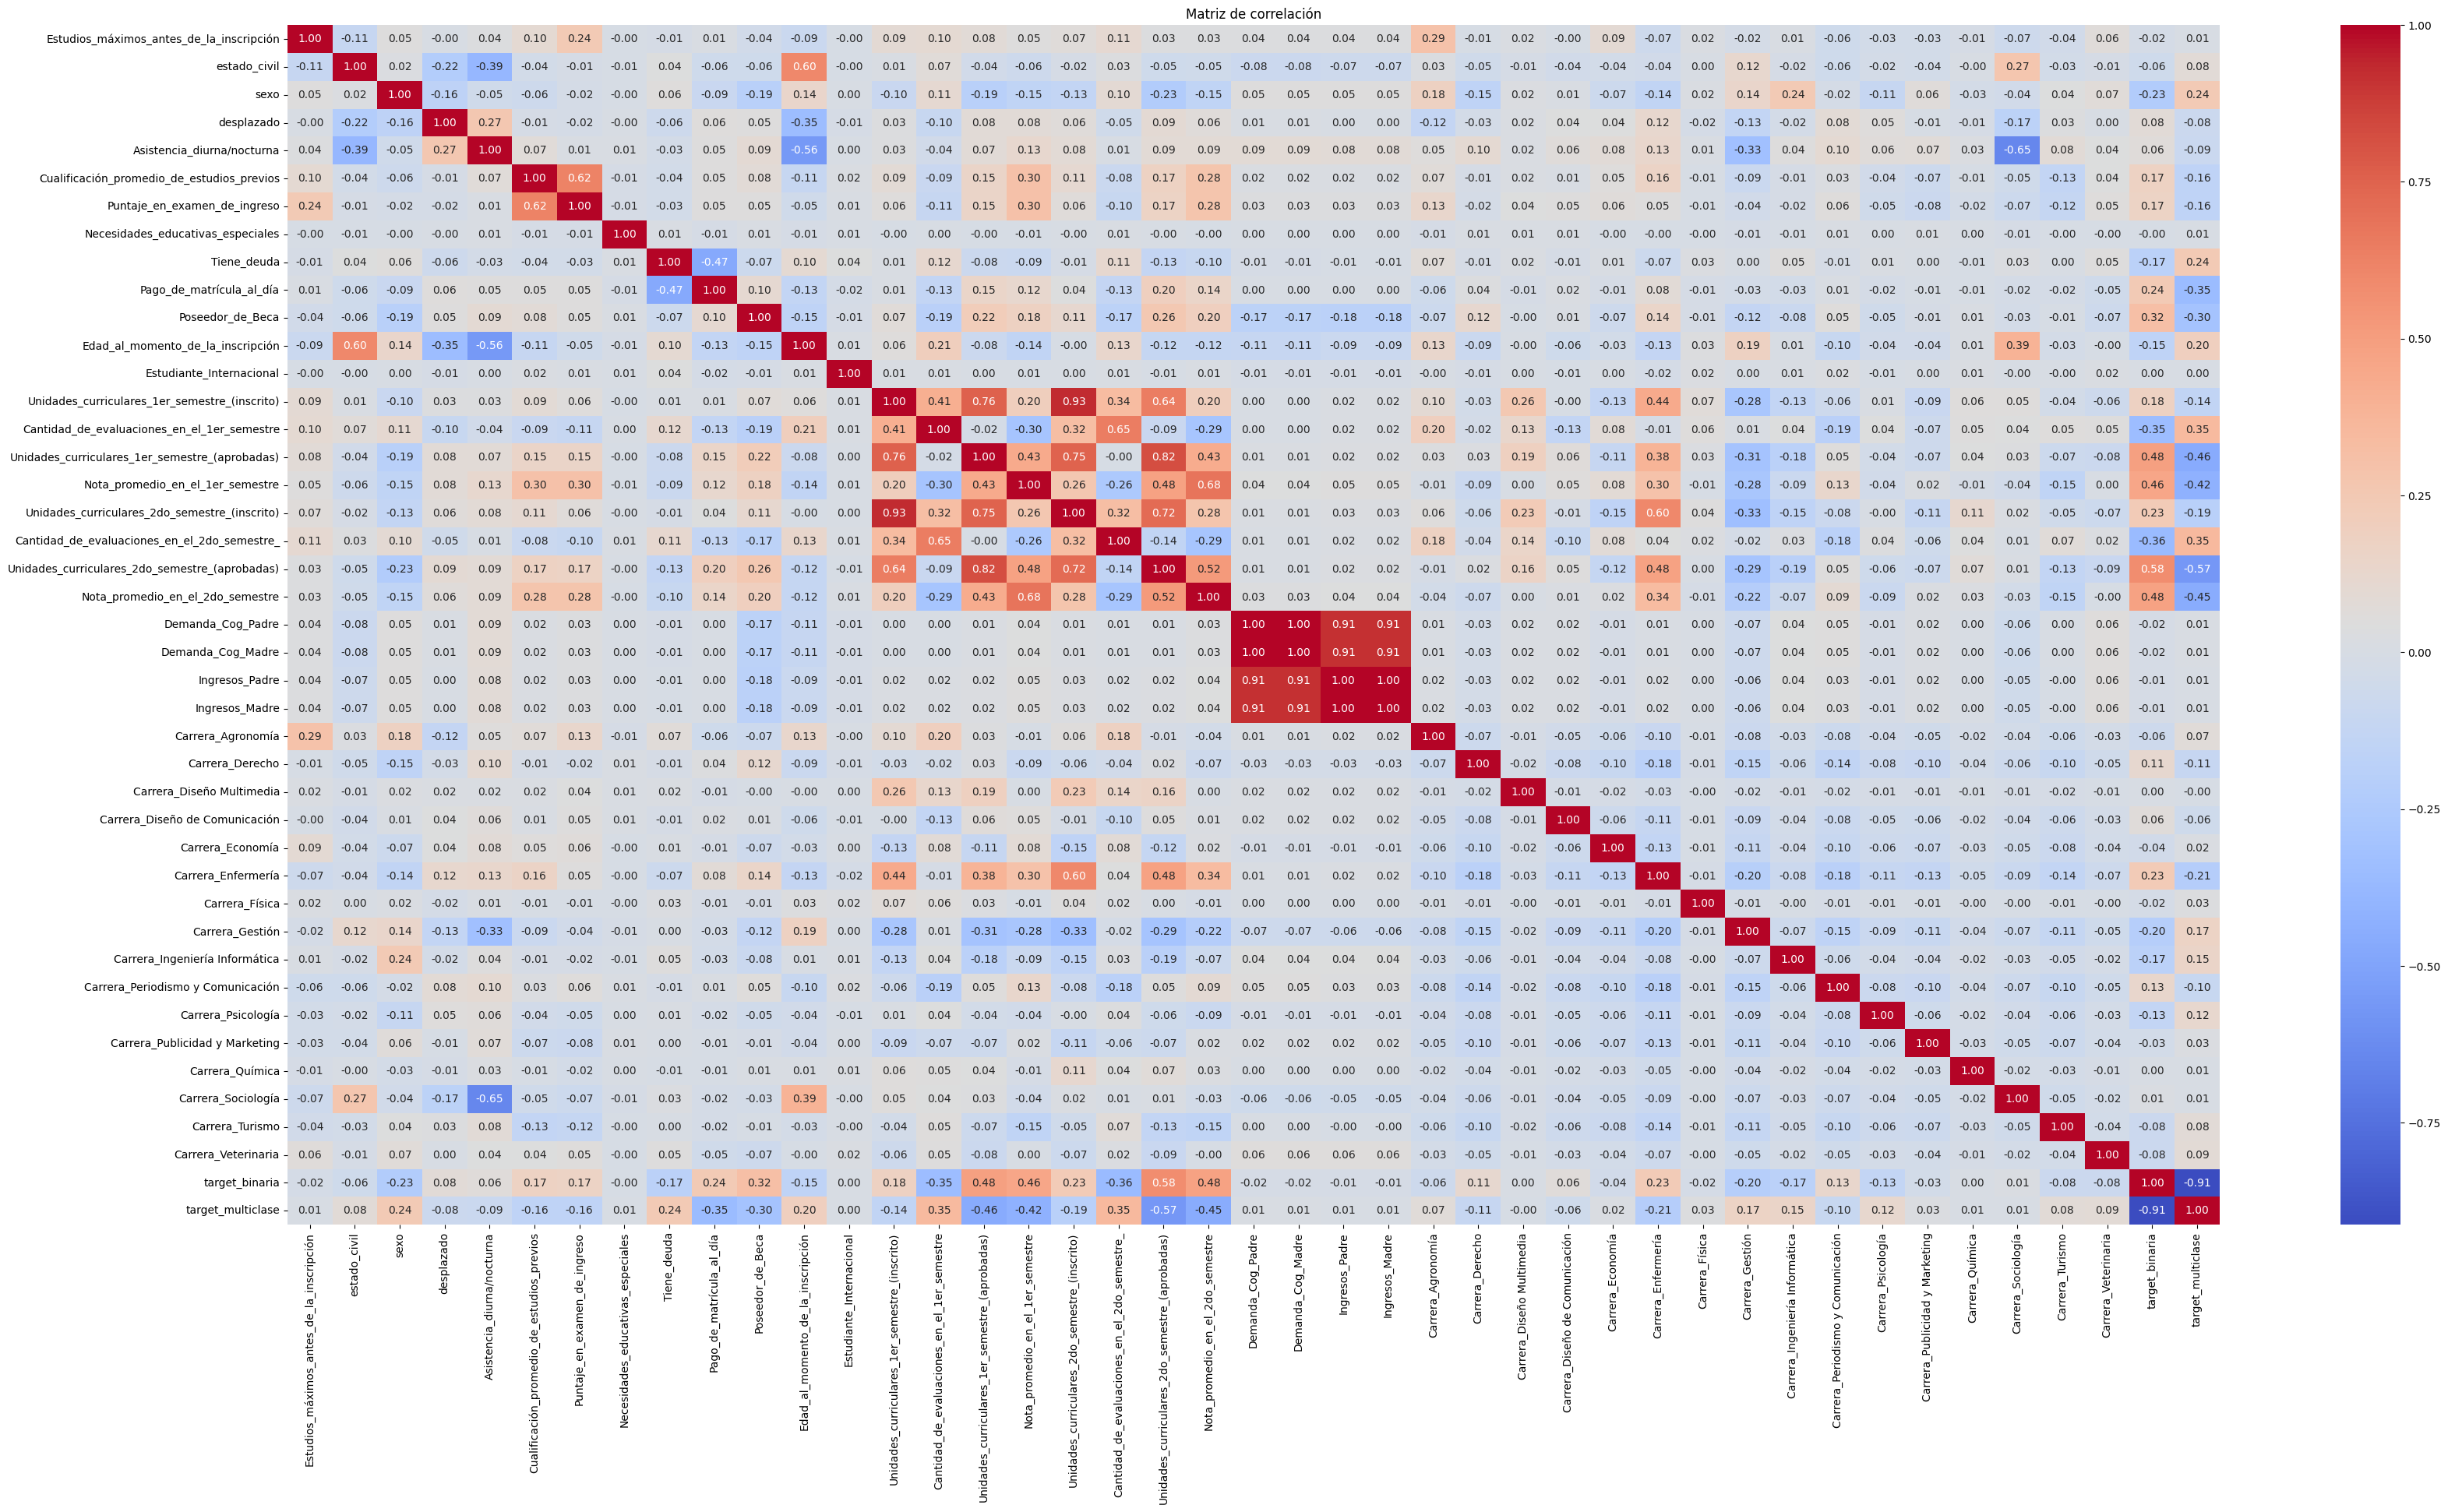

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# Modelo binario

In [97]:
df_int_binario = df_int.drop(columns=['target_multiclase'])

In [98]:
# Separar features y target
X = df_int_binario.drop('target_binaria', axis=1)
y = df_int_binario['target_binaria']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Regresión logística

In [49]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
modelo_lr = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=10000
)

# Entrenar con datos escalados
modelo_lr.fit(X_train_scaled, y_train)

# Ambas predicciones con datos escalados
y_pred = modelo_lr.predict(X_test_scaled)
y_pred_proba = modelo_lr.predict_proba(X_test_scaled)


Accuracy: 0.8519

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4365
           1       0.89      0.87      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.84     11502
weighted avg       0.85      0.85      0.85     11502



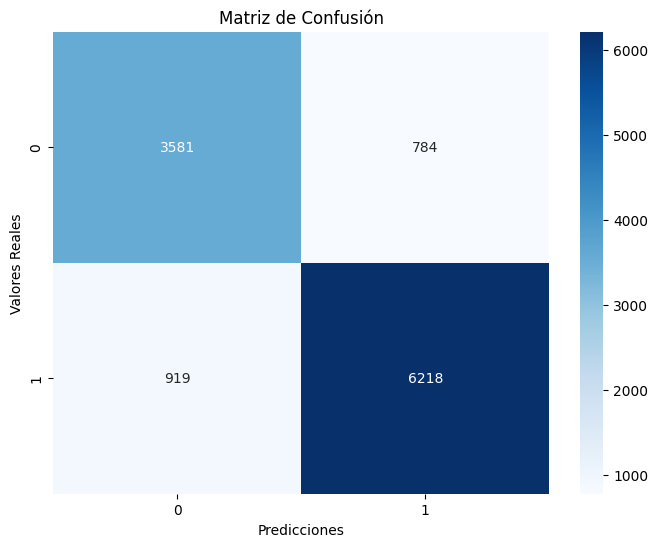

In [50]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()


In [51]:
# Obtener los coeficientes del modelo
coeficientes = modelo_lr.coef_  # o modelo_lr según cuál uses
feature_names = X_train.columns

# Para multiclase, tenemos coeficientes para cada clase
n_classes = len(modelo_lr.classes_)
print(f"Clases: {modelo_lr.classes_}")
print(f"Shape coeficientes: {coeficientes.shape}")

# Calcular importancia absoluta promedio
importancia_abs = np.mean(np.abs(coeficientes), axis=0)

# Crear DataFrame con importancias
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importancia_abs
}).sort_values('importance', ascending=False)

print("\nTop Features más importantes:")
print(feature_importance_df.head(50))

Clases: [0 1]
Shape coeficientes: (1, 41)

Top Features más importantes:
                                           feature  importance
19  Unidades_curriculares_2do_semestre_(aprobadas)    1.477590
15  Unidades_curriculares_1er_semestre_(aprobadas)    0.743379
17   Unidades_curriculares_2do_semestre_(inscrito)    0.600794
9                         Pago_de_matrícula_al_día    0.489162
20                Nota_promedio_en_el_2do_semestre    0.422675
10                                Poseedor_de_Beca    0.370435
13   Unidades_curriculares_1er_semestre_(inscrito)    0.349601
18    Cantidad_de_evaluaciones_en_el_2do_semestre_    0.300134
16                Nota_promedio_en_el_1er_semestre    0.295537
26                                 Carrera_Derecho    0.292029
33                  Carrera_Ingeniería Informática    0.256290
35                              Carrera_Psicología    0.216918
14     Cantidad_de_evaluaciones_en_el_1er_semestre    0.209818
8                                      Tiene_

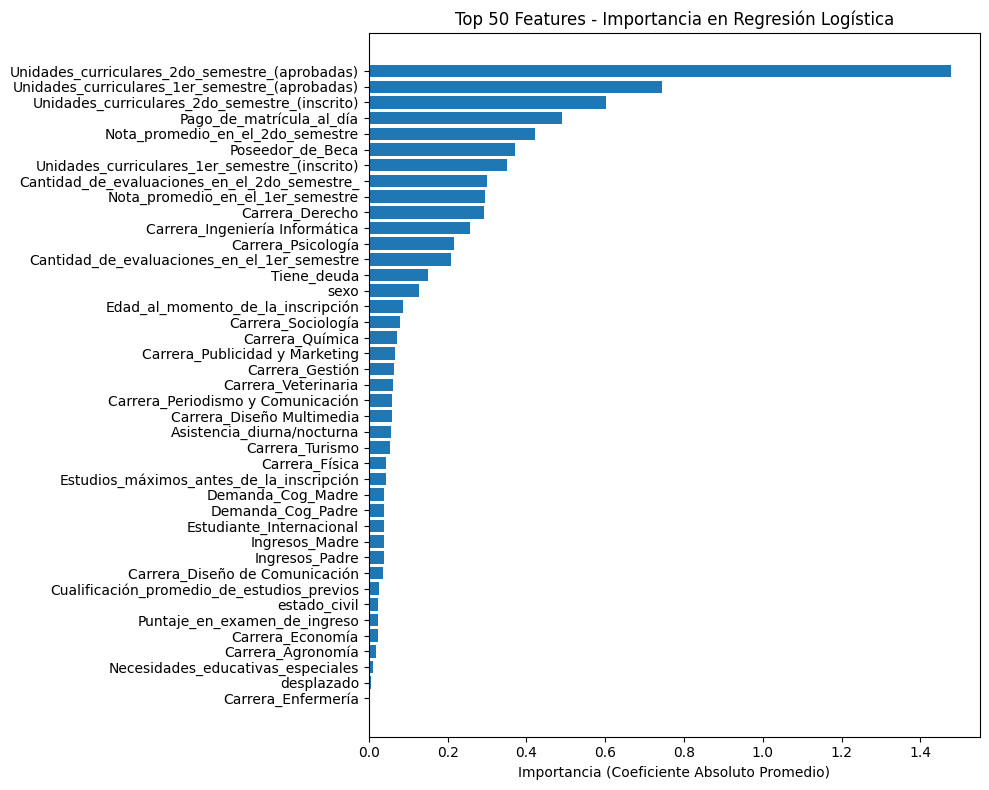

In [52]:
# Plot de las top features
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(50)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia (Coeficiente Absoluto Promedio)')
plt.title('Top 50 Features - Importancia en Regresión Logística')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### smote, para manejo de desbalance


Accuracy con SMOTE: 0.8523

Reporte de Clasificación con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4365
           1       0.89      0.87      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.84     11502
weighted avg       0.85      0.85      0.85     11502



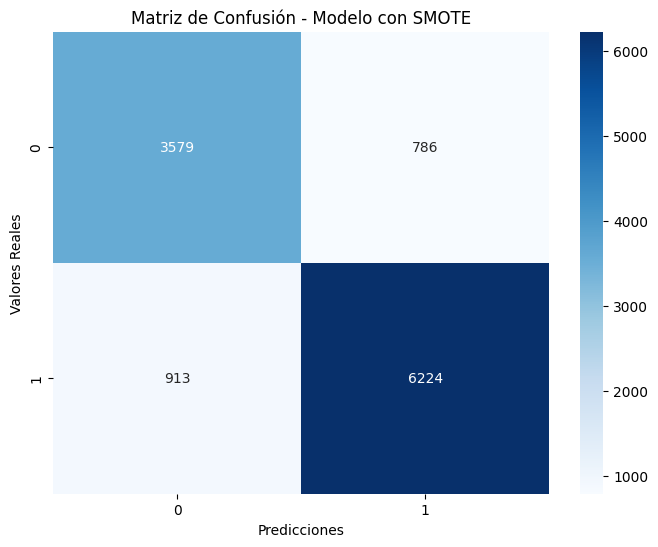

In [53]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# 1. Escalar los datos ANTES de SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Aplicar SMOTE a los datos escalados
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 3. Entrenar modelo
modelo_lr_smote = LogisticRegression(
    random_state=42,
    max_iter=10000  # Mantener el valor actual
)

modelo_lr_smote.fit(X_train_smote, y_train_smote)

# 4. Predicciones (usar datos escalados)
y_pred_smote = modelo_lr_smote.predict(X_test_scaled)
y_pred_proba_smote = modelo_lr_smote.predict_proba(X_test_scaled)

# Evaluación
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"\nAccuracy con SMOTE: {accuracy_smote:.4f}")

print("\nReporte de Clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Modelo con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

### Máquina de vectores de soporte (SVM) 

In [54]:
from sklearn.svm import SVC

# Crea el modelo SVM sin SMOTEs
modelo_svm = SVC(kernel='linear', C=1, random_state=42)

# Entrenar el modelo con los datos de train escalados
modelo_svm.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svm = modelo_svm.predict(X_test_scaled)

Accuracy SVM: 0.8584
Accuracy de la clasificación: 85.19%

Reporte de Clasificación SVM:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4365
           1       0.86      0.92      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.86      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502



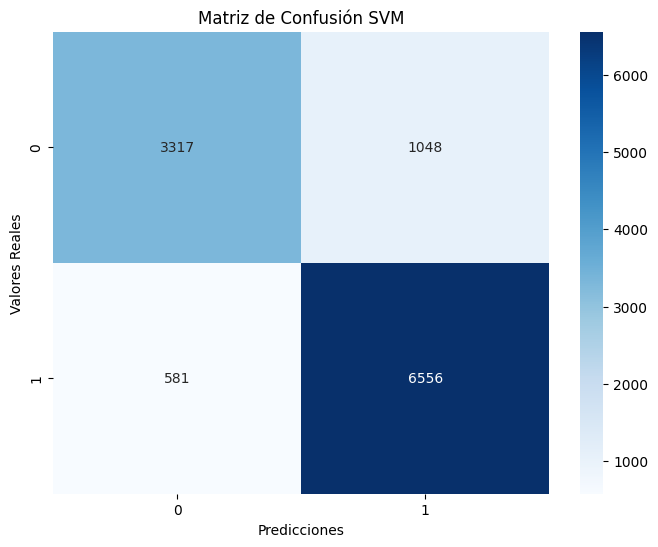

In [55]:
# --- Evaluación SVM sin SMOTE ---
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM: {accuracy_svm:.4f}")
print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

print("\nReporte de Clasificación SVM:")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión SVM')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

#### smote

In [56]:
from sklearn.svm import SVC

# Crear el modelo SVM con smote
# SVM con SMOTE
modelo_svm_smote = SVC(
    kernel='linear', #"rfb"
    #class_weight='balanced',
    probability=True,
    random_state=42
)
modelo_svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = modelo_svm_smote.predict(X_test_scaled)
y_pred_svm_smote_proba = modelo_svm_smote.predict_proba(X_test_scaled)


Accuracy SVM con SMOTE: 0.8533

Reporte de Clasificación SVM con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4365
           1       0.89      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.84     11502
weighted avg       0.85      0.85      0.85     11502



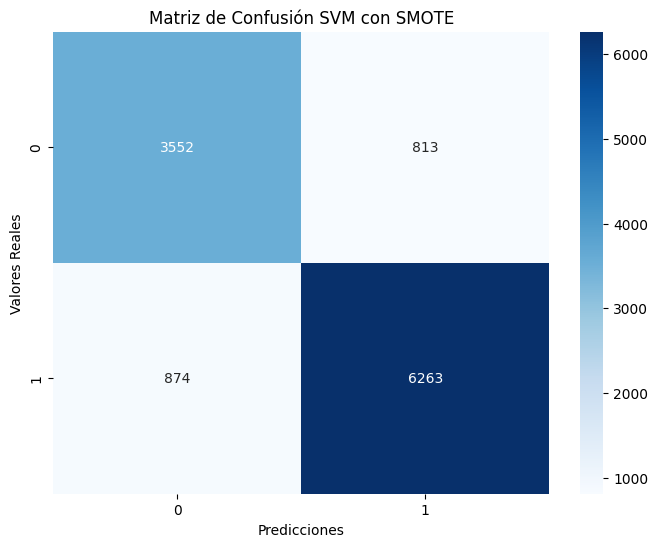

In [57]:
#Evaluacion matriz confusion SVM con SMOTE
accuracy_svm_smote = accuracy_score(y_test, y_pred_svm_smote)
print(f"\nAccuracy SVM con SMOTE: {accuracy_svm_smote:.4f}")

print("\nReporte de Clasificación SVM con SMOTE:")
print(classification_report(y_test, y_pred_svm_smote))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_svm_smote = confusion_matrix(y_test, y_pred_svm_smote)
sns.heatmap(cm_svm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión SVM con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

### Árboles de Decisión 


In [58]:
#Modelo Random forest sin smote
### Random Forest sin SMOTE     
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
modelo_rf.fit(X_train_scaled, y_train)
y_pred_rf = modelo_rf.predict(X_test_scaled)    
#Evaluacion matriz confusion Random Forest sin SMOTE
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy Random Forest: {accuracy_rf:.4f}")


Accuracy Random Forest: 0.8583


Accuracy de la clasificación: 85.83%

Reporte de Clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      4365
           1       0.87      0.91      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.85      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502



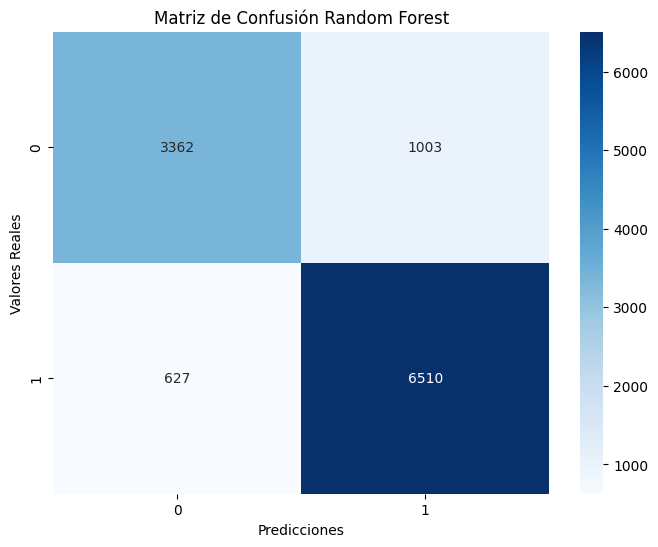

In [59]:
#Accuracy RF sin smote
print("Accuracy de la clasificación: {:.2f}%".format(accuracy_rf * 100))

#matriz de confusion RF sin smote
print("\nReporte de Clasificación Random Forest:")  
print(classification_report(y_test, y_pred_rf))
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Random Forest')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()


#### smote

In [60]:
#Generar modelo con random forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf_smote = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=42
)

modelo_rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = modelo_rf_smote.predict(X_test_scaled)    



Accuracy RF con SMOTE: 0.8476

Reporte de Clasificación RF con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4365
           1       0.87      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.84      0.84     11502
weighted avg       0.85      0.85      0.85     11502

Accuracy de la clasificación: 84.76%


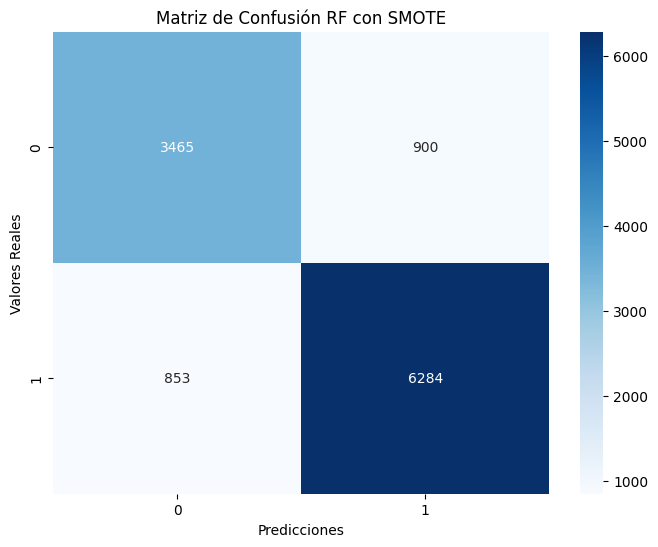

In [61]:
#Accuracy RF con SMOTE
accuracy_rf = accuracy_score(y_test, y_pred_rf_smote)
print(f"\nAccuracy RF con SMOTE: {accuracy_rf:.4f}")

#reporte de clasificación RF con SMOTE
print("\nReporte de Clasificación RF con SMOTE:")
print(classification_report(y_test, y_pred_rf_smote))
print("Accuracy de la clasificación: {:.2f}%".format(accuracy_rf * 100))

#matriz de confusión RF con SMOTE
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf_smote    )
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión RF con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

#### Optuna para RF sin SMOTE

In [62]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Definimos el espacio de búsqueda de hiperparámetros
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    
    # Definir el modelo
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar con los datos escalados sin SMOTE
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    
    # Calcular accuracy
    acc = accuracy_score(y_test, y_pred)
    return acc

# Crear el estudio
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # podés subir n_trials (ej: 100) si tenés tiempo

# Mostrar los mejores parámetros y el mejor score
print("Mejores hiperparámetros:", study.best_params)
print("Mejor accuracy:", study.best_value)


ModuleNotFoundError: No module named 'optuna'

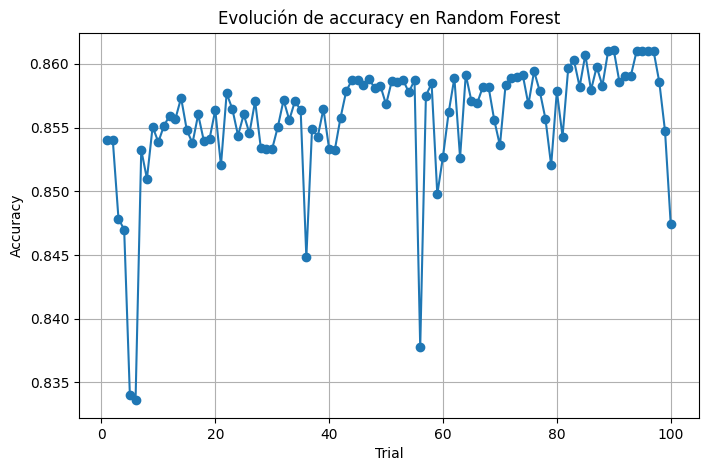

In [ ]:
import matplotlib.pyplot as plt

# Extraer los valores de accuracy de cada trial
accuracies = [t.value for t in study.trials]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o')
plt.title("Evolución de accuracy en Random Forest")
plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## VOTING

In [ ]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [ ]:
df_int_binario = df_int.drop(columns=['target_multiclase'])

# Separar features y target
X = df_int_binario.drop('target_binaria', axis=1)
y = df_int_binario['target_binaria']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Pipeline permite encadenar múltiples pasos de procesamiento o modelos en un solo objeto.
#Con esta función le pido crear cada versión con y sin SMOTE de Regresión, SVM y RF.
#Yo voy a hacer que se vote entre todas las combinaciones posibles pero se podría hacer una votación entre modelos con smote y una votación entre modelos sin smote.

pipe_lr = Pipeline([('lr', LogisticRegression(random_state=42, class_weight='balanced', max_iter=10000))])
pipe_lr_smote = Pipeline([('smote', SMOTE(random_state=42)),('lr', LogisticRegression(random_state=42, max_iter=10000))])

pipe_svm = Pipeline([('svm', SVC(probability=True, random_state=42, kernel='linear', C=1))])
pipe_svm_smote = Pipeline([('smote', SMOTE(random_state=42)),('svm', SVC(probability=True, random_state=42, kernel='linear'))])

pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced',))])
pipe_rf_smote = Pipeline([('smote', SMOTE(random_state=42)),('rf', RandomForestClassifier(random_state=42, n_estimators=500, max_depth=6))])


voting_clf = VotingClassifier(
    estimators=[
        ('lr', pipe_lr),            
        ('lr_smote', pipe_lr_smote),
        ('svm', pipe_svm),
        ('svm_smote', pipe_svm_smote),
        ('rf', pipe_rf),
        ('rf_smote', pipe_rf_smote)], voting='hard')    #SOFT PARA PREDICCIÓN DE PROBA. HARD PARA PREDICCIÓN DE CLASE.


#voting concatena la información de todas las salidas para predecir.
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('lr',
                                               LogisticRegression(class_weight='balanced',
                                                                  max_iter=10000,
                                                                  random_state=42))])),
                             ('lr_smote',
                              Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                              ('lr',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=42))])),
                             ('svm',
                              Pipeline(steps=[('svm',
                                               SVC(C=1, kernel='linear',
                                                   probability=True,
                                                   random_state=42))])),...
                              Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                              ('svm',
                                               SVC(kernel='linear',
                                                   probability=True,
                                                   random_state=42))])),
                             ('rf',
                              Pipeline(steps=[('rf',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      random_state=42))])),
                             ('rf_smote',
                              Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                              ('rf',
                                               RandomForestClassifier(max_depth=6,
                                                                      n_estimators=500,
                                                                      random_state=42))]))])

In [ ]:
print(f"Accuracy training : {voting_clf.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy test: {voting_clf.score(X_test_scaled, y_test):.3f}")

Accuracy training : 0.858
Accuracy test: 0.854


VOTING CLASSIFIER - RESULTADO FINAL
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4365
           1       0.89      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.85     11502
weighted avg       0.85      0.85      0.85     11502



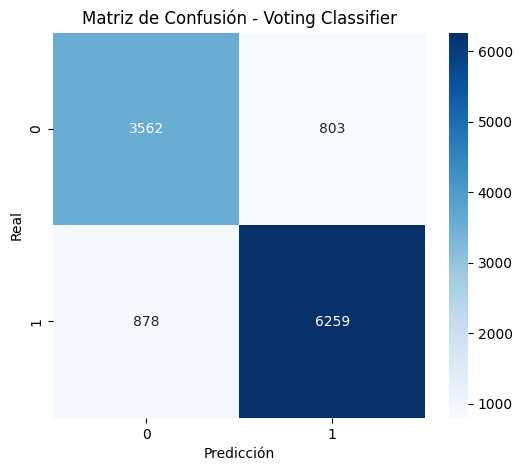

In [ ]:
# Predicciones del voting classifier
y_pred_voting = voting_clf.predict(X_test_scaled)

print("VOTING CLASSIFIER - RESULTADO FINAL")
print("="*60)
print(classification_report(y_test, y_pred_voting))

# Matriz de confusión
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Voting Classifier')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

## Boosting

In [103]:
# Tu modelo multiclase
model = lgb.LGBMClassifier(
    objective='binary',
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    verbose=-1 
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8628
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4365
           1       0.87      0.92      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.86      0.85      0.85     11502
weighted avg       0.86      0.86      0.86     11502



# Modelo multiclase

## Carga de datos

In [ ]:
#Correr carga de librerías y dataset y EDA antes de este paso.
X = df_int.drop(columns=['target_multiclase', 'target_binaria'])
y = df_int['target_multiclase']

In [ ]:
#Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN

### Sin smote

k=2, Accuracy=0.7346
k=5, Accuracy=0.7547
k=7, Accuracy=0.7615
k=10, Accuracy=0.7646
k=12, Accuracy=0.7655
k=15, Accuracy=0.7667
k=20, Accuracy=0.7671


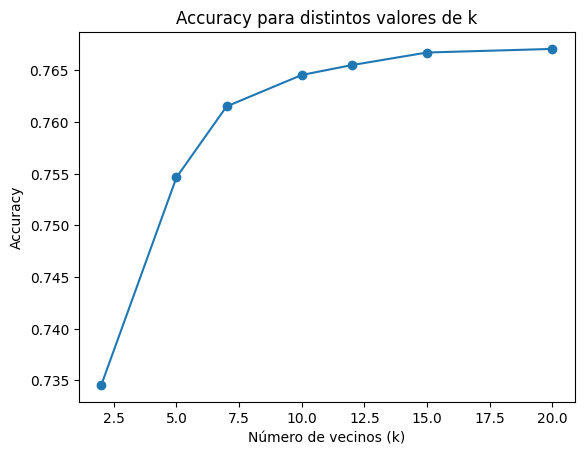

In [ ]:
#Pruebo distintos valores de vecinos cercanos para ver cuál predice mejor
k_values = [2, 5, 7, 10, 12, 15, 20]

accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Graficar resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy para distintos valores de k")
plt.show()


In [ ]:
#Uso el mejor valor de k-vecinos para armar el modelo
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 76.15%


In [ ]:
#Veo el reporte de la clasificación
print(classification_report(y_test, y_pred))

'''
Precisión: "cuando el modelo predice clase x, acierta el x% de las veces." VP / (VP+FP) De todas las veces que el modelo dijo que algo era positivo, ¿cuántas veces acertó?
Recall: "de todos los verdaderos clase x, el modelo detecta el x%." VP / (VP+FN) De todos los casos que realmente eran positivos, ¿cuántos identificó correctamente el modelo?
F1: promedio armónico entre precision y recall.

'''

              precision    recall  f1-score   support

           1       0.82      0.93      0.87      7137
           2       0.60      0.55      0.58      2817
           3       0.69      0.34      0.46      1548

    accuracy                           0.76     11502
   macro avg       0.70      0.61      0.64     11502
weighted avg       0.75      0.76      0.74     11502



'\nPrecisión: "cuando el modelo predice clase x, acierta el x% de las veces." VP / (VP+FP) De todas las veces que el modelo dijo que algo era positivo, ¿cuántas veces acertó?\nRecall: "de todos los verdaderos clase x, el modelo detecta el x%." VP / (VP+FN) De todos los casos que realmente eran positivos, ¿cuántos identificó correctamente el modelo?\nF1: promedio armónico entre precision y recall.\n\n'

### Con smote

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

k=2, Accuracy=0.7079
k=5, Accuracy=0.6780
k=7, Accuracy=0.6808
k=10, Accuracy=0.6943
k=12, Accuracy=0.6943
k=15, Accuracy=0.6926
k=20, Accuracy=0.7006


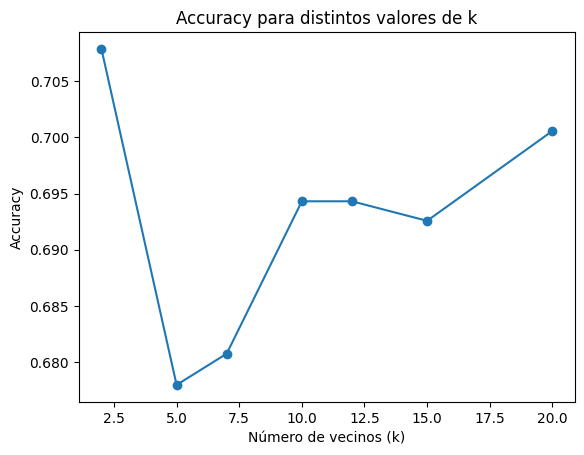

In [ ]:
#Pruebo distintos valores de vecinos cercanos para ver cuál predice mejor
k_values = [2, 5, 7, 10, 12, 15, 20]

accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred_smote)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Graficar resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy para distintos valores de k")
plt.show()

In [ ]:
#Uso el mejor valor de k-vecinos para armar el modelo
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_smote)
print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 76.71%


In [ ]:
#Veo el reporte de la clasificación
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           1       0.82      0.85      0.84      7137
           2       0.52      0.49      0.50      2817
           3       0.47      0.43      0.45      1548

    accuracy                           0.71     11502
   macro avg       0.60      0.59      0.60     11502
weighted avg       0.70      0.71      0.70     11502



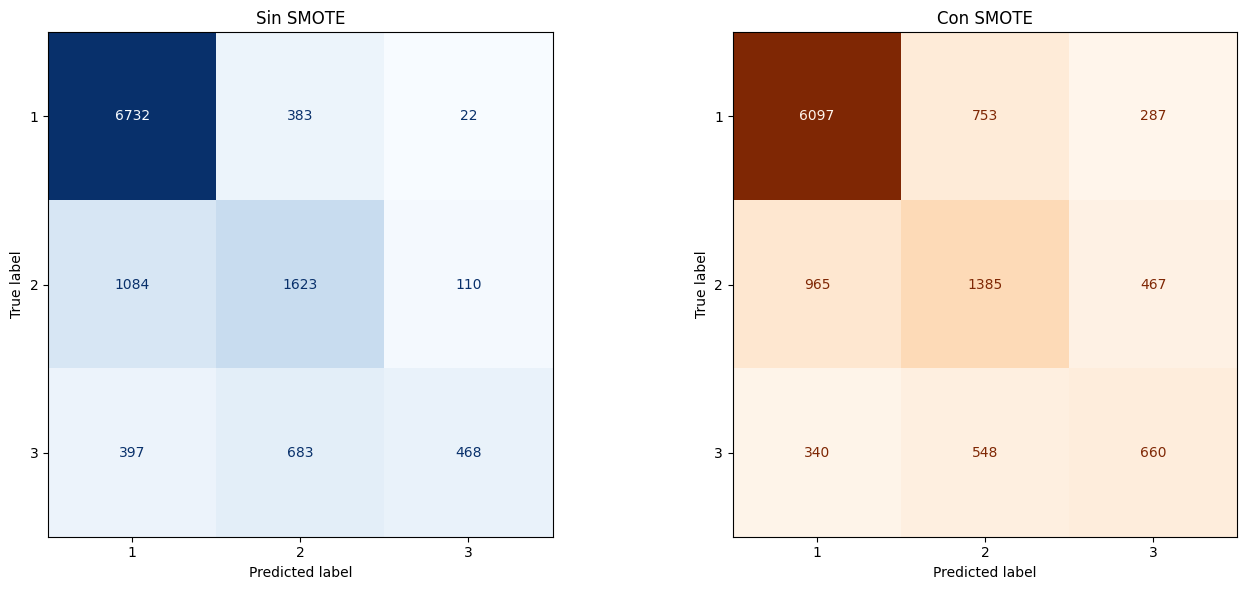

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matriz sin SMOTE
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=axes[0], colorbar=False)
axes[0].set_title("Sin SMOTE")

# Matriz con SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=model.classes_)
disp_smote.plot(cmap=plt.cm.Oranges, ax=axes[1], colorbar=False)
axes[1].set_title("Con SMOTE")

plt.tight_layout()
plt.show()

In [ ]:
'''' Con SMOTE predice mejor la clase 3, es decir a los graduados, pero se pierde precisión para predecir a las demás
Como el objetivo es predecir la clase 1, no tiene sentido utilizar esta estrategia '''

## Random Forest

In [ ]:
#RF no necesita escalar datos. Realizao la búsqueda de hiperparámetros con método random
#En la búsqueda de hiperparámetros, penalizara más los errores en la clase minoritaria ('class_weight')
# Con esta estrategia, descarto realizar el SMOTE.  

parameters = {'n_estimators':range(10, 51, 10), 'max_depth': range(5, 10), 'bootstrap':[True, False], 'min_samples_leaf': [1, 5, 10, 50],
              'max_features':['sqrt', 'log2', None], 'class_weight': ['balanced', None]}
clf = RandomizedSearchCV(RandomForestClassifier(random_state=42), parameters, scoring='accuracy',cv=5, n_iter=50, random_state=42)

clf.fit(X_train, y_train)
rf = clf.best_estimator_
print (clf.best_score_, clf.best_params_)
print("Accuracy training : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_test, y_test)))

0.7827116090993105 {'n_estimators': 40, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8, 'class_weight': None, 'bootstrap': True}
Accuracy training : 0.796
Accuracy test: 0.784


In [ ]:
#RF final con los mejores HP encontrados
rf_final = RandomForestClassifier(**clf.best_params_, random_state=42)   # ** hace unpacking de diccionarios
rf_final.fit(X_train, y_train)

y_pred_final = rf_final.predict(X_test)


print("Accuracy training : {:.3f}".format(rf_final.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(rf_final.score(X_test, y_test)))

Accuracy training : 0.796
Accuracy test: 0.784


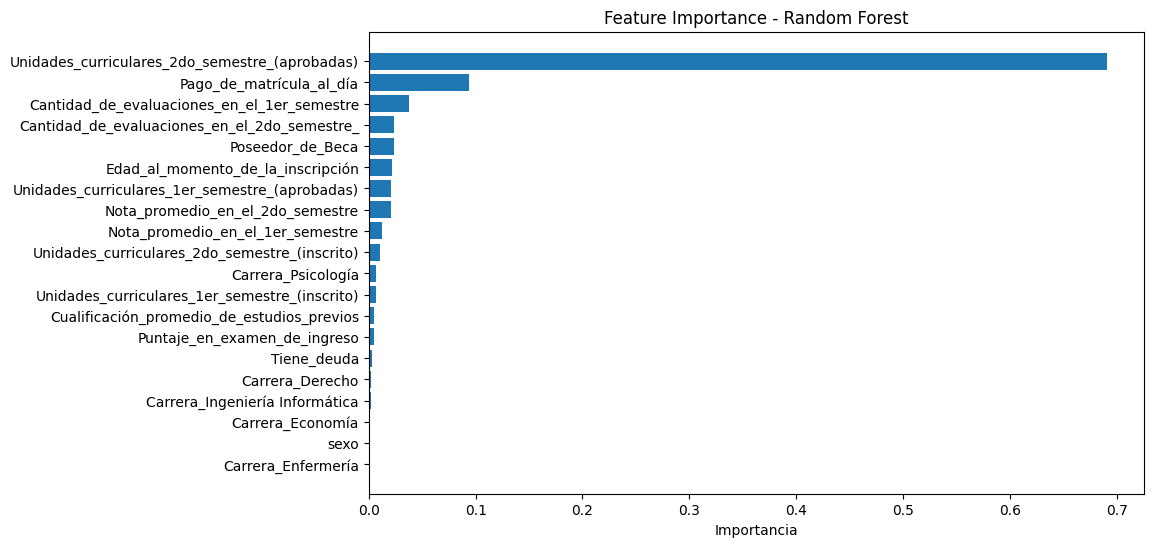

In [ ]:
# Obtener la importancia de las features
importances = rf_final.feature_importances_
feature_names = X_train.columns 
feat_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances})

# Ordenar de mayor a menor
feat_importances = feat_importances.sort_values(by='importance', ascending=False).head(20)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(feat_importances['feature'], feat_importances['importance'])
plt.gca().invert_yaxis()  # para que la más importante quede arriba
plt.xlabel('Importancia')
plt.title('Feature Importance - Random Forest')
plt.show()

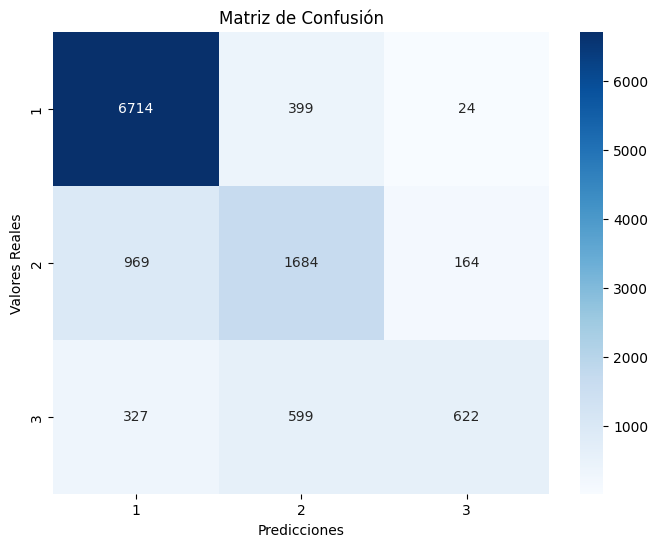

              precision    recall  f1-score   support

           1       0.84      0.94      0.89      7137
           2       0.63      0.60      0.61      2817
           3       0.77      0.40      0.53      1548

    accuracy                           0.78     11502
   macro avg       0.74      0.65      0.68     11502
weighted avg       0.78      0.78      0.77     11502



In [ ]:
from sklearn.metrics import classification_report

# Definir las clases originales
clases = [1, 2, 3]  # tus clases reales
nombres = ['1', '2', '3']

cm = confusion_matrix(y_test, y_pred_final, labels=clases)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nombres, yticklabels=nombres)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print(classification_report(y_test, y_pred_final, labels=clases, target_names=nombres))

##  Boosting y Bagging

In [ ]:
# modelo multiclase
model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3, 
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    verbose=-1 
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7933
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7137
           1       0.64      0.62      0.63      2817
           2       0.75      0.44      0.56      1548

    accuracy                           0.79     11502
   macro avg       0.75      0.67      0.69     11502
weighted avg       0.79      0.79      0.78     11502



In [89]:
print(y_train)

36823    1
16549    0
16034    0
48615    0
38675    0
        ..
11868    0
33317    2
41860    0
9078     0
17783    1
Name: target_multiclase, Length: 46008, dtype: int64


In [ ]:
X = df_int.drop(['target_binaria', 'target_multiclase'], axis=1)
y = df_int['target_multiclase']

# RECODIFICAR: convertir [1,2,3] a [0,1,2]
y = y - 1  # Restar 1 a todas las clases

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Clases únicas: [0 1 2]


In [91]:
import xgboost as xgb

# Modelo XGBoost para multiclase
model = xgb.XGBClassifier(
    objective='multi:softmax',  
    num_class=3,                
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# Entrenar
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7938

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7137
           1       0.64      0.63      0.63      2817
           2       0.76      0.44      0.55      1548

    accuracy                           0.79     11502
   macro avg       0.75      0.67      0.69     11502
weighted avg       0.79      0.79      0.78     11502



In [ ]:
# Definir modelo base
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

# Definir grid de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # o 'f1_macro' para desbalanceo
    n_jobs=-1,  # usar todos los cores
    verbose=2
)

print("Iniciando Grid Search...")
grid_search.fit(X_train, y_train)

# Mejores parámetros
print("\n" + "="*50)
print("MEJORES PARÁMETROS:")
print("="*50)
print(grid_search.best_params_)
print(f"\nMejor Score CV: {grid_search.best_score_:.4f}")

# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir con mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar
print("\n" + "="*50)
print("RESULTADOS EN TEST:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Iniciando Grid Search...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, 

/Users/sofiaforni/Documents/FCEN UBA Maestria/aprendizaje automatico 2025/aprendizaje_automatico_desertores/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_de

In [96]:
# Grid más pequeño para pruebas rápidas
param_grid_small = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1, 0.3],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [3, 5]
}

grid_search = GridSearchCV(
    estimator=CatBoostClassifier(
        loss_function='MultiClass',
        random_seed=42,
        verbose=False
    ),
    param_grid=param_grid_small,
    cv=5, 
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Predecir con mejor modelo
y_pred = grid_search.predict(X_test)

# Evaluar
print("\n" + "="*50)
print("RESULTADOS EN TEST:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/sofiaforni/Documents/FCEN UBA Maestria/aprendizaje automatico 2025/aprendizaje_automatico_desertores/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.




RESULTADOS EN TEST:
Accuracy: 0.7935

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7137
           1       0.64      0.62      0.63      2817
           2       0.73      0.45      0.56      1548

    accuracy                           0.79     11502
   macro avg       0.74      0.67      0.69     11502
weighted avg       0.79      0.79      0.78     11502

